In [1]:
from qiskit import *
circuit = QuantumCircuit(3,4)
circuit.h(0)
circuit.measure(0,0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure([0,1,2],[1,2,3])

In [2]:
simulator=Aer.get_backend('qasm_simulator')
results=execute(circuit,simulator,shots=1024).result()
counts=results.get_counts()

In [3]:
counts

{'1011': 125,
 '1001': 134,
 '1111': 110,
 '0000': 124,
 '0010': 113,
 '0110': 138,
 '0100': 140,
 '1101': 140}

In [4]:
from qiskit.tools.visualization import plot_histogram

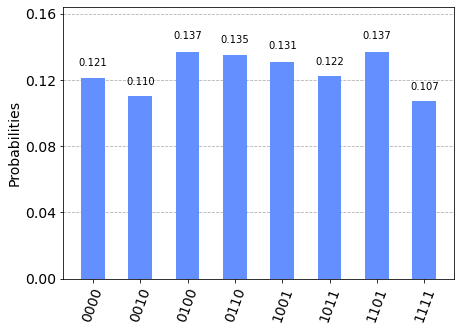

In [5]:
plot_histogram(counts)

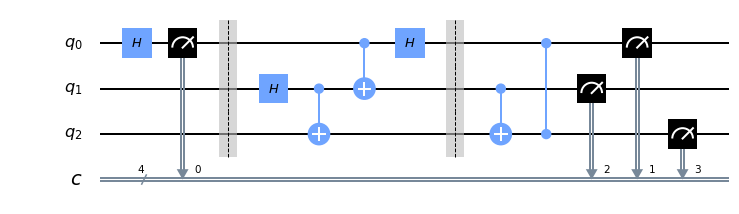

In [6]:
circuit.draw(output='mpl')

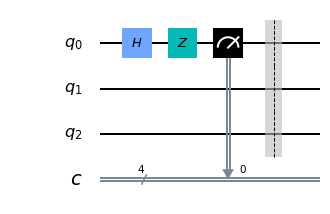

In [11]:
'''The first hadamard gate preps the q-bit we want to copy.
The second Hadamard gate seems to prep the bit to apply the phase difference.
Here the the teleportation algorithm seems to work despite the measurement 
early on because there is no phase change in the q-bit we are trying to copy.
That may break once we change the phase of the q0 although I do not know if 
relative phase change is measured in qiskit and I doubt it will be preserved at first measurement.'''
circuit = QuantumCircuit(3,4)
circuit.h(0)
circuit.z(0)
circuit.measure(0,0)
circuit.barrier()
circuit.draw(output='mpl')

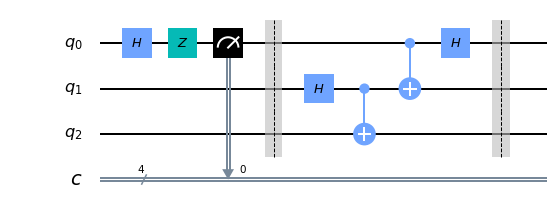

In [12]:
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

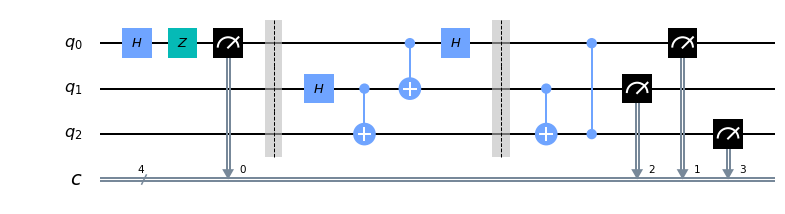

In [13]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.measure([0,1,2],[1,2,3])
circuit.draw(output='mpl')

In [14]:
simulator=Aer.get_backend('qasm_simulator')

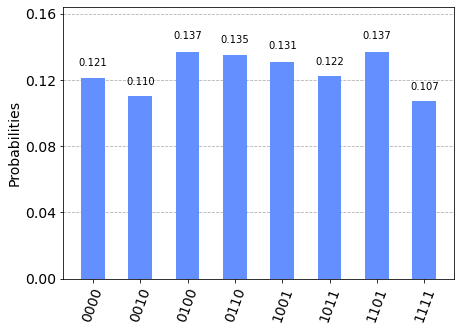

In [15]:
resutls=execute(circuit,simulator, shots=1024).result()
counts=results.get_counts()
plot_histogram(counts)

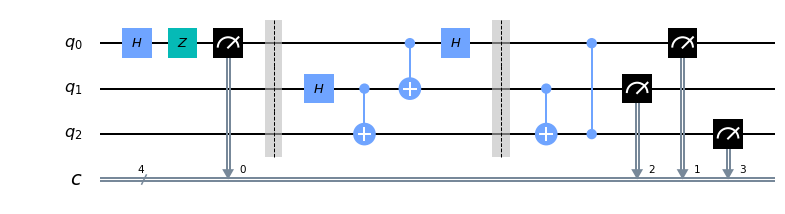

In [16]:
'''There is no trace of phase change in this. 
In a way we can't verify if the phase change was copied.
It's out of the scope of this tutorial'''
circuit.draw(output='mpl')

In [35]:
'''What if we don't measure the first qubit before the barrier.'''
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.z(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)


In [36]:
circuit.measure([0,1,2],[0,1,2])

In [39]:
simulator=Aer.get_backend('qasm_simulator')
result=execute(circuit,simulator, shots=1024).result()

In [40]:
counts=0
counts=result.get_counts()
print(counts)

{'011': 118, '101': 148, '000': 129, '111': 131, '010': 138, '001': 115, '110': 115, '100': 130}


In [41]:
circuit.draw()

┌───┐┌───┐ ░                ┌───┐ ░            ┌─┐   
q_0: ┤ H ├┤ Z ├─░─────────────■──┤ H ├─░───────■────┤M├───
     └───┘└───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░       │ ┌─┐└╥┘   
q_1: ───────────░─┤ H ├──■──┤ X ├──────░───■───┼─┤M├─╫────
                ░ └───┘┌─┴─┐└───┘      ░ ┌─┴─┐ │ └╥┘ ║ ┌─┐
q_2: ───────────░──────┤ X ├───────────░─┤ X ├─■──╫──╫─┤M├
                ░      └───┘           ░ └───┘    ║  ║ └╥┘
c_0: ═════════════════════════════════════════════╬══╩══╬═
                                                  ║     ║ 
c_1: ═════════════════════════════════════════════╩═════╬═
                                                        ║ 
c_2: ═══════════════════════════════════════════════════╩═

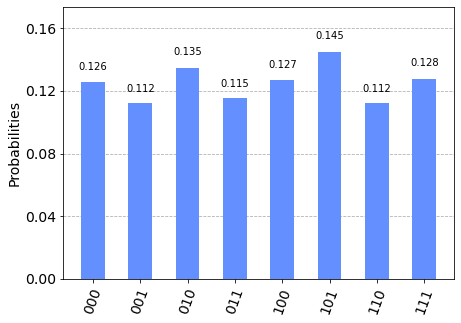

In [42]:
plot_histogram(counts)